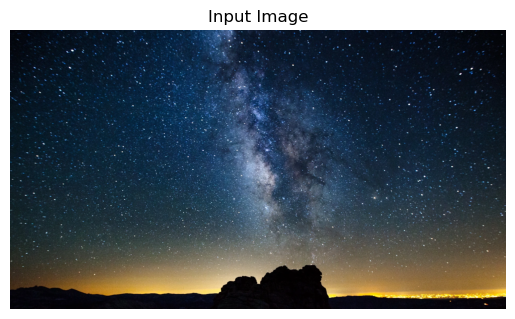

Colorfulness Score: 35.95


In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to calculate colorfulness
def calculate_colorfulness(image):
    # Convert to float and split into channels
    (R, G, B) = cv2.split(image.astype("float"))

    # rg = R - G
    rg = np.absolute(R - G)

    # yb = 0.5*(R + G) - B
    yb = np.absolute(0.5 * (R + G) - B)

    # Compute standard deviation and mean
    std_rg, mean_rg = np.std(rg), np.mean(rg)
    std_yb, mean_yb = np.std(yb), np.mean(yb)

    # Combine the metrics
    std_root = np.sqrt(std_rg**2 + std_yb**2)
    mean_root = np.sqrt(mean_rg**2 + mean_yb**2)

    # Final colorfulness score
    colorfulness = std_root + (0.3 * mean_root)
    return colorfulness

# Load and display image
def load_and_score_image(image_path):
    image = cv2.imread(image_path)
    if image is None:
        print(f"Could not load image: {image_path}")
        return

    # Convert BGR to RGB for display
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Show image
    plt.imshow(image_rgb)
    plt.axis('off')
    plt.title("Input Image")
    plt.show()

    # Calculate and print colorfulness
    score = calculate_colorfulness(image_rgb)
    print(f"Colorfulness Score: {score:.2f}")

# Example usage
image_path = "/Users/parker.pape/Downloads/image5.webp" # Replace with your image path
load_and_score_image(image_path)